# Cars4U Project

## About Dataset
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

# Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

## Data Dictionary
- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in dollars
- Price: The price of the used car in dollars
    
# Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Import the Required Packages

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
#Importing the libraries for data manipulation and visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from typing import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score,precision_score, recall_score, f1_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from joblib import Parallel, delayed
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.over_sampling import SMOTE

## Load the Dataset

In [2]:
# Load the Dateset
df = pd.read_csv('used_cars_data-1.csv')

df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


# Explore the Dataset

In [3]:
# check the first few rows of the data


df.shape

(7253, 14)

In [4]:
# Check the data types


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


In [5]:
# check for missing values


df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [6]:
# display some descriptive statistics of the data


df.describe()

,S.No.,Year,Kilometers_Driven,Seats,New_Price,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,7253.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,21.307322,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,24.256314,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,7.880000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,11.300000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,21.690000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,375.000000,160.000000


In [7]:
# select only the features that are object data types and observe

cat_df = df.select_dtypes(include = 'object')
cat_df.describe()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,7253,7253,7253,7253,7253,7251,7207,7078
unique,2041,11,5,2,4,450,150,385
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp
freq,55,949,3852,5204,5952,207,732,280


In [8]:
df = pd.DataFrame(df)

secting_cols = df.select_dtypes(include=['object']).columns.tolist

print(secting_cols)

<bound method IndexOpsMixin.tolist of Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')>


#### Explore each variable to note the issue with each varaible
#### Print all the categories with their counts

In [9]:
for col in cat_df:
    print(df[col].value_counts())
    print('-' * 50)

Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64
--------------------------------------------------
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------

# Data Cleaning

### Treating the Name

In [10]:
df['Name']

0                                  Maruti Wagon R LXI CNG
1                        Hyundai Creta 1.6 CRDi SX Option
2                                            Honda Jazz V
3                                       Maruti Ertiga VDI
4                         Audi A4 New 2.0 TDI Multitronic
                              ...                        
7248                    Volkswagen Vento Diesel Trendline
7249                               Volkswagen Polo GT TSI
7250                               Nissan Micra Diesel XV
7251                               Volkswagen Polo GT TSI
7252    Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...
Name: Name, Length: 7253, dtype: object

In [11]:
# Clean and preprocess the 'Name' column
df['Name'] = df['Name'].str.lower()  # Convert to lowercase
df['Brand_Name'] = df['Name'].str.split(' ').str[0]  # Extract brand name

In [12]:
 # Drop the original 'Name' column
df = df.drop('Name', axis=1)

In [13]:
df['Brand_Name']

0              maruti
1             hyundai
2               honda
3              maruti
4                audi
            ...      
7248       volkswagen
7249       volkswagen
7250           nissan
7251       volkswagen
7252    mercedes-benz
Name: Brand_Name, Length: 7253, dtype: object

In [14]:
df['Brand_Name'].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand_Name, dtype: int64

In [15]:
# set threshold to 300
threshold = 300

# get the value count of platforms
Brand_vc = df["Brand_Name"].value_counts()


# filter the platforms to only those with at least 1000 occurrence
new_brand_list = Brand_vc[Brand_vc.values >= threshold].index.tolist()

In [16]:
print(new_brand_list)

['maruti', 'hyundai', 'honda', 'toyota', 'mercedes-benz', 'volkswagen', 'ford', 'mahindra', 'bmw']


In [17]:
# to replace the remaing with others 
brand_val = []

# Iterate over each row in the dataframe
for i in range(df.shape[0]):

   #  getting the values in plat from  column
    txt = df.Brand_Name.values[i] 
    
     # Initialize flag variable to 0
    flag = 0  

    # Iterate over the new_platforms list
    for item in new_brand_list:  
        # If the item is in the current row and flag is 0, append the item to platform_vals
        if item in txt and flag == 0:  
            brand_val.append(item)
            flag = 1

    # If the flag is 0, the row value is not in the new platforms list. Append "Others" to platform_vals
    if flag == 0:  
        brand_val.append("Others")

In [18]:
# creating a new column from exiting colum (feature engineering)
df["Car_Name"] = brand_val

In [19]:
# sanity check: 
df["Car_Name"].value_counts()

Others           1471
maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
Name: Car_Name, dtype: int64

In [20]:
 # Drop the 'Brand_Name' column
df = df.drop('Brand_Name', axis=1)

In [21]:
# Clean and preprocess the 'Location' column
df['Location'] = df['Location'].str.lower()  # Convert to lowercase

In [22]:
# Clean and preprocess the 'Year' column
df['Year'] = df['Year'].apply(lambda x: int(x))  # Convert to integer

### Treating the Mileage

In [23]:
# checking the value count
df['Mileage'].value_counts()

17.0 kmpl     207
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
             ... 
22.8 km/kg      1
8.0 kmpl        1
7.81 kmpl       1
14.47 kmpl      1
17.15 kmpl      1
Name: Mileage, Length: 450, dtype: int64

If we look at the Mileage Columns, we see that the column contains 2 units - a) km/kg b) kmpl

A quick Google search gave me :-

1 liter of mileage = 710 to 775 grams ~= 742.5

In [24]:
# to know the number of km/kg and kmpl the mileage columns
kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 74 
The number of rows with Kmpl : 7177 


In [25]:
# To convert 'km/kg' to 'kmpl'
Correct_Mileage= [] #  creates an empty list named Correct_Mileage which will store the corrected mileage values.
for i in df.Mileage: # starts a for loop that will iterate through each value in the Mileage column of the df DataFrame.
    if str(i).endswith('km/kg'): # checks if the string representation of the current Mileage value ends with the substring 'km/kg'.
        i = i[:-5] # removes the last 5 characters (i.e., 'km/kg') from the current Mileage value.
        i = float(i)*1.40 # This converts the current Mileage value to a float and multiplies it by 1.40 to correct for the difference in energy content between CNG and petrol.
        Correct_Mileage.append(float(i)) # appends the corrected Mileage value to the Correct_Mileage list.
    elif str(i).endswith('kmpl'): # If the Mileage value doesn't end with 'km/kg', this checks if it ends with 'kmpl'.
        i = i[:-5] # This removes the last 5 characters (i.e., 'kmpl') from the current Mileage value.
        #print(i)
        Correct_Mileage.append(float(i)) # This appends the corrected Mileage value to the Correct_Mileage list.
#     for unit in str(i).split(" "):
#         print(type(unit))
#         if unit=='km/kg':
#             print('kmkg')

In [26]:
# convert the list to a pandas series object.
correct_mileage_series = pd.Series(Correct_Mileage)

In [27]:
# new pandas DataFrame 
Correct_Mileage = pd.DataFrame(Correct_Mileage)
Correct_Mileage = Correct_Mileage.reindex(df.index)

In [28]:
# Save the correct_ Mileage in the data
df["Correct_Mileage"] = Correct_Mileage

In [29]:
# check Summary
df["Correct_Mileage"].describe()

count    7251.000000
mean       18.240986
std         4.839919
min         0.000000
25%        15.260000
50%        18.200000
75%        21.100000
max        46.956000
Name: Correct_Mileage, dtype: float64

In [30]:
# we can decide to fill missing values with median value 

df['Correct_Mileage'].fillna(df['Correct_Mileage'].median(), inplace = True)

In [31]:
 # Drop the original 'Mileage' column
df = df.drop('Mileage', axis=1)

In [32]:
# Sanity check 

df.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Price,Car_Name,Correct_Mileage
0,0,mumbai,2010,72000,CNG,Manual,First,998 CC,58.16 bhp,5.0,5.51,1.75,maruti,37.24
1,1,pune,2015,41000,Diesel,Manual,First,1582 CC,126.2 bhp,5.0,16.06,12.50,hyundai,19.67
2,2,chennai,2011,46000,Petrol,Manual,First,1199 CC,88.7 bhp,5.0,8.61,4.50,honda,18.20
3,3,chennai,2012,87000,Diesel,Manual,First,1248 CC,88.76 bhp,7.0,11.27,6.00,maruti,20.77
4,4,coimbatore,2013,40670,Diesel,Automatic,Second,1968 CC,140.8 bhp,5.0,53.14,17.74,Others,15.20


In [33]:
# Clean and preprocess the 'Fuel_Type' column
df['Fuel_Type'] = df['Fuel_Type'].str.lower()  # Convert to lowercase

In [34]:
# Clean and preprocess the 'Transmission' column
df['Transmission'] = df['Transmission'].str.lower()  # Convert to lowercase

In [35]:
# Clean and preprocess the 'Owner_Type' column
df['Owner_Type'] = df['Owner_Type'].str.lower()  # Convert to lowercase

### Treating Engine

In [36]:
# check the missing value in Engine
df['Engine'].isnull().sum()

46

In [37]:
df['Engine']

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [38]:
# Lets convert the engine CC's to a numeric value
df['Engine'] = df['Engine'].str.replace(' CC','').astype(np.float64)

In [39]:
# Missing value treatment for Engine using the median
df['Engine']=df['Engine'].fillna(df['Engine'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Engine             7253 non-null   float64
 8   Power              7078 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Name           7253 non-null   object 
 13  Correct_Mileage    7253 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 793.4+ KB


In [40]:
df['Engine']

0        998.0
1       1582.0
2       1199.0
3       1248.0
4       1968.0
         ...  
7248    1598.0
7249    1197.0
7250    1461.0
7251    1197.0
7252    2148.0
Name: Engine, Length: 7253, dtype: float64

In [41]:
#checking the mising value
df['Engine'].isnull().sum()

0

### Treating Power

In [50]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

In [54]:
# Lets convert the power to a numeric value
df['Power'] = df['Power'].replace(' bhp','').astype(np.float64)

In [55]:
#checking the mising value
df['Power'].isnull().sum()

175

In [56]:
# Missing value treatment for Power using the median
df['Power']=df['Power'].fillna(df['Power'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Engine             7253 non-null   float64
 8   Power              7253 non-null   float64
 9   Seats              7200 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              6019 non-null   float64
 12  Car_Name           7253 non-null   object 
 13  Correct_Mileage    7253 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


### Treating Seats

In [57]:
#Checking the missing value in Seat
df['Seats'].isnull().sum()

53

In [58]:
df['Seats'].describe()

count    7200.000000
mean        5.279722
std         0.811660
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        10.000000
Name: Seats, dtype: float64

In [59]:
# we can decide to fill missing values with median value 

df['Seats'].fillna(df['Seats'].median(), inplace = True)

### Treating Seats

In [60]:
df['Price'].isnull().sum()

1234

In [61]:
# we can decide to fill missing values with median value 

df['Price'].fillna(df['Price'].median(), inplace = True)

In [63]:
# checking the missing Value 
df.isnull().sum()

S.No.                0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Car_Name             0
Correct_Mileage      0
dtype: int64

- The dataset is cleaning and we can start visualizing ad create a model to predict

# Data Visualization

## Univariate Analysis: Numerical Features

In [64]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

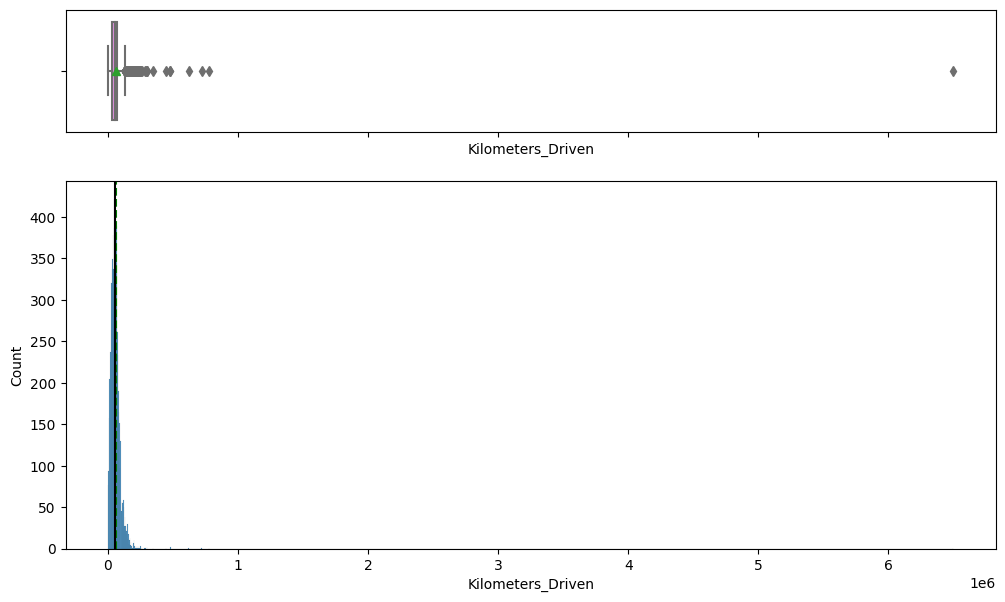

In [65]:
histogram_boxplot(data = df, feature = 'Kilometers_Driven')

The plot shows that there is a lot of outliers in KilometerS the car was driven

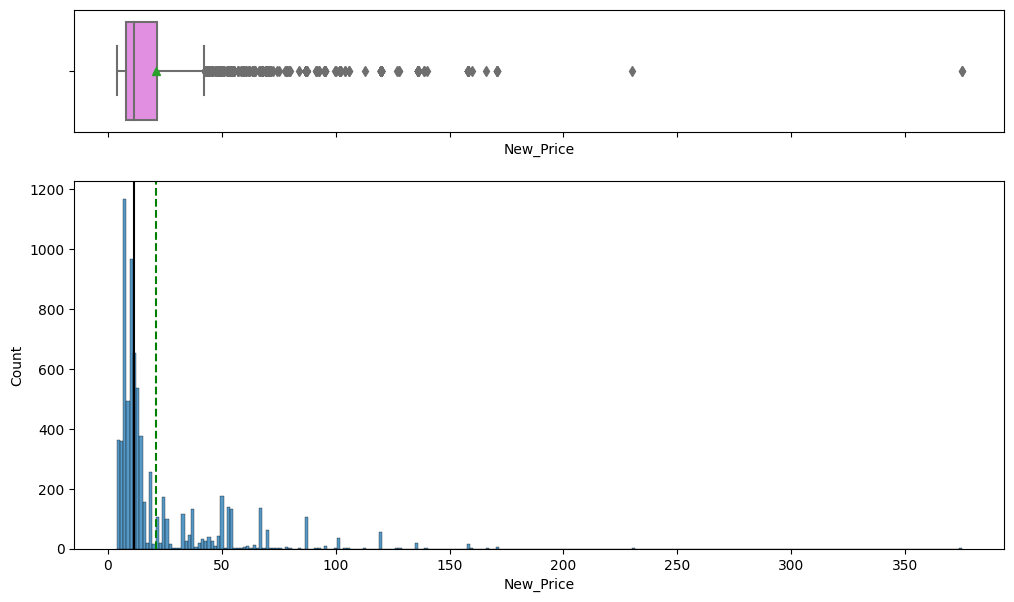

In [66]:
histogram_boxplot(data = df, feature = 'New_Price')

The plot shows that there is a lot of outliers

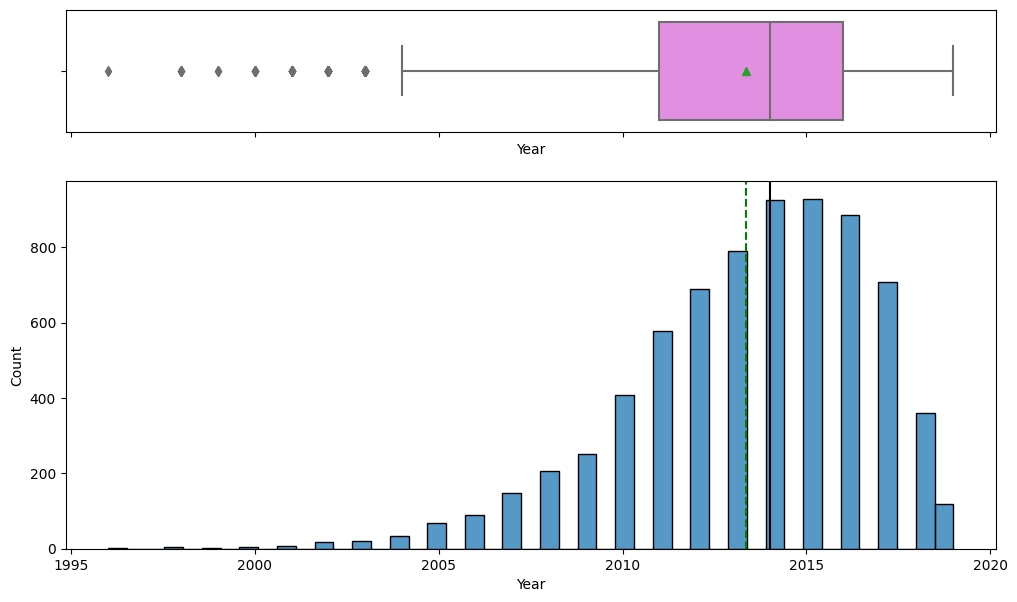

In [67]:
histogram_boxplot(data = df, feature = 'Year')

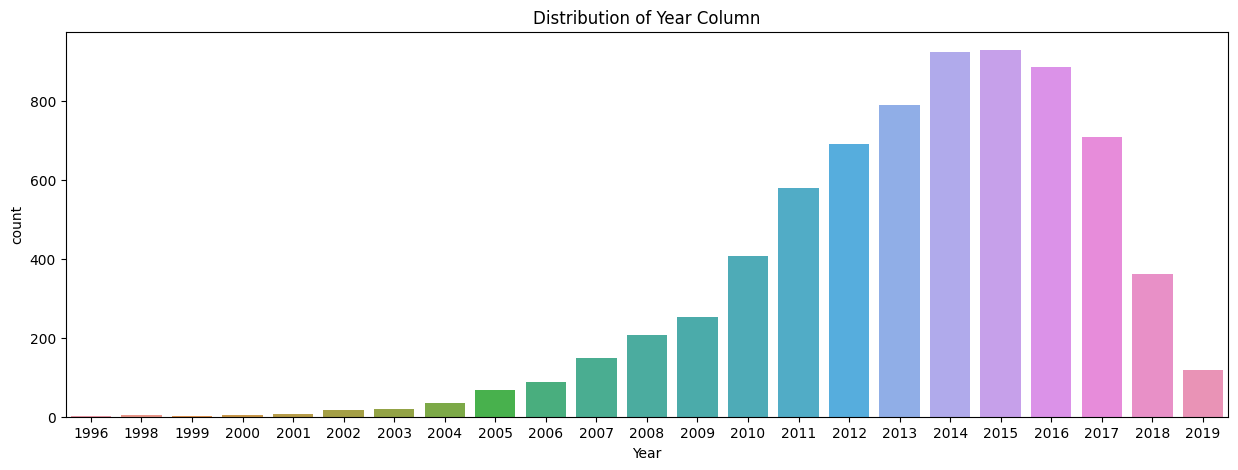

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(df,x='Year');
plt.title('Distribution of Year Column');

The plot shows that the years is left skwede

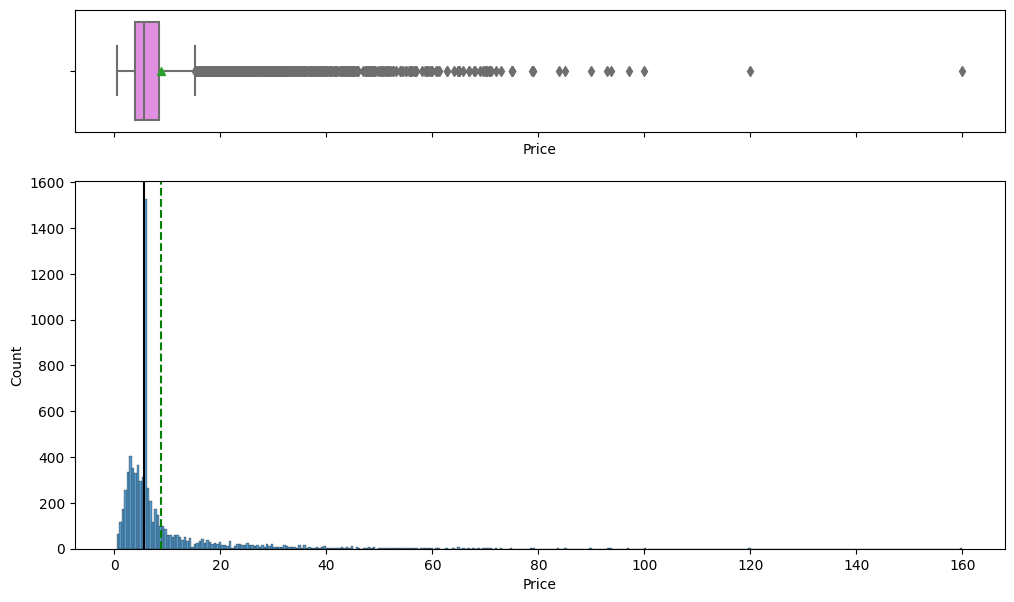

In [69]:
histogram_boxplot(data = df, feature = 'Price')

The plot shows that there is alot of outliers in the old price

## Univariate Analysis: Categorical Features

In [70]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, title = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

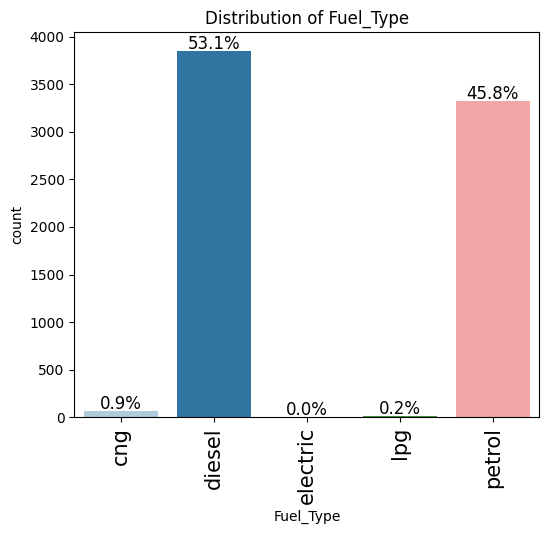

In [71]:
labeled_barplot(data = df, feature = 'Fuel_Type', perc = True, title = 'Distribution of Fuel_Type')

The plot above show that 53% of the cars ion this dataset use Diesel while 46% use Petrol, CNG with 9% and LPG with 2%

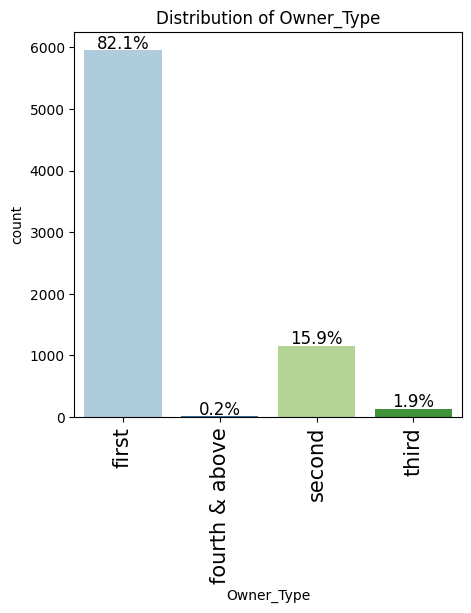

In [72]:
labeled_barplot(data = df, feature = 'Owner_Type', perc = True, title = 'Distribution of Owner_Type')

82% of the owner of the cars in the dataset were First owner, while 16% were second owner and 2% were third owner

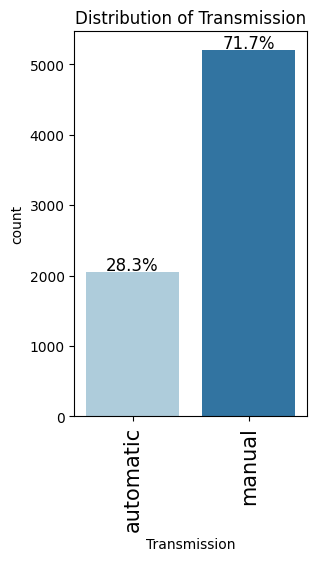

In [73]:
labeled_barplot(data = df, feature = 'Transmission', perc = True, title = 'Distribution of Transmission')

72% of the cars in the dataset were Manual while the remaining 28% were automatic, this show that more people used manual cars in the this dataset

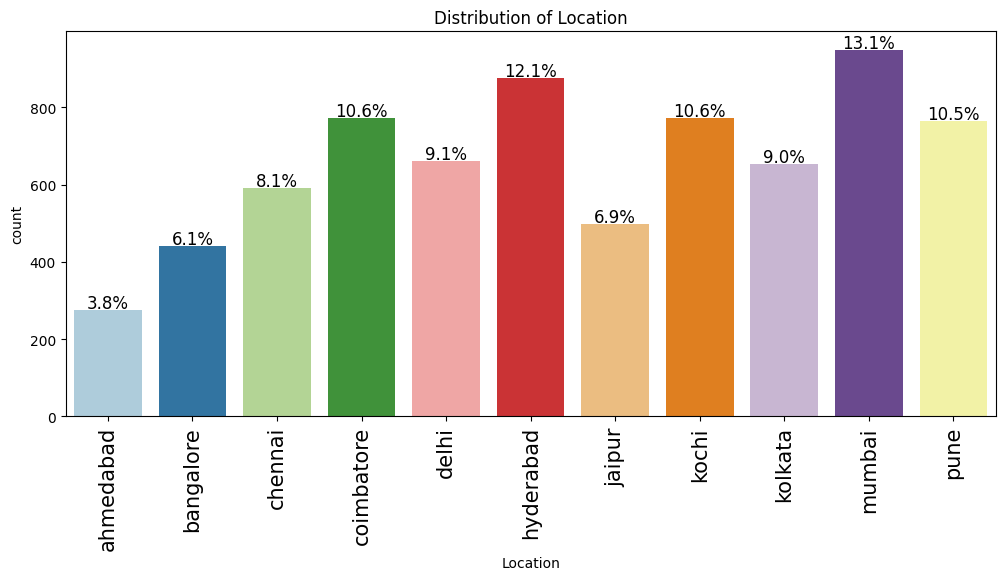

In [74]:
labeled_barplot(data = df, feature = 'Location', perc = True, title = 'Distribution of Location')

13% of the cars were produce in Mumbai, while 12% of the cars were produce in Hyderabad, 11% were produce in Kochi, Coinmbatore, and Pune.

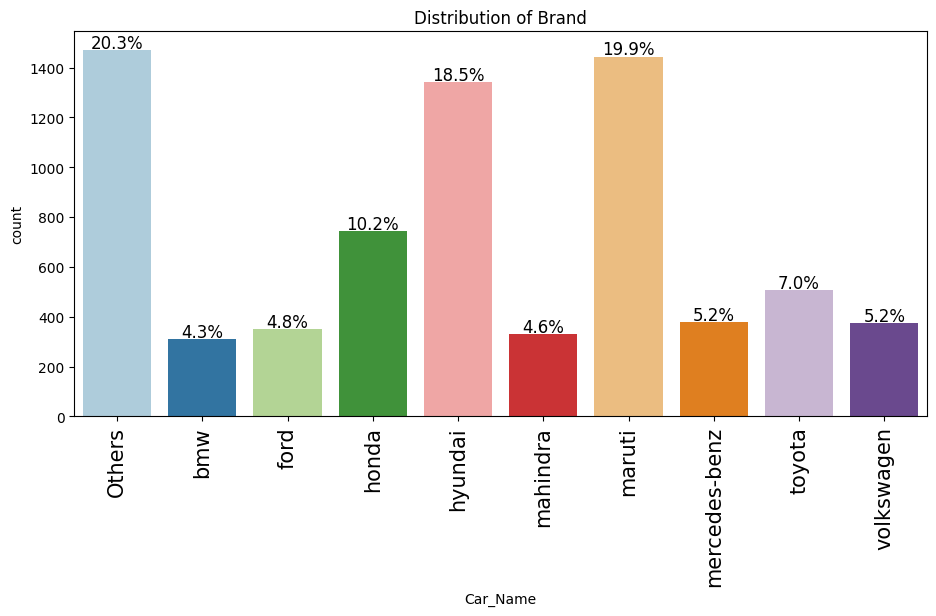

In [75]:
labeled_barplot(data = df, feature = 'Car_Name', perc = True, title = 'Distribution of Brand')

## Bivariate Analyasis

In [76]:
# Selecting all the numeric variable in the dataset 
num_data = df.select_dtypes(include = 'number')

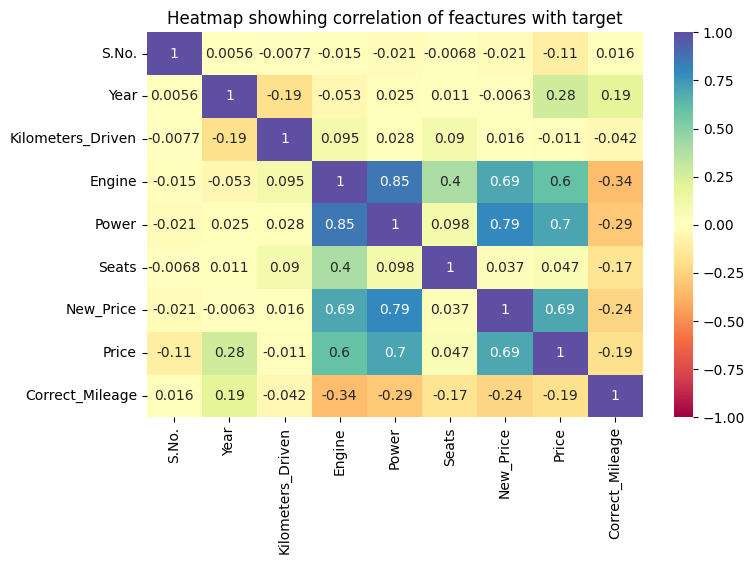

In [77]:
# Creating correlation heatmap
mat_cor = num_data.corr()

plt.figure(figsize = (8, 5))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showhing correlation of feactures with target');

There is Multicollinearity, because there is higher correlation between one another, like Power and Enine, Power and Price, Power and New_Price, also New_Price and Engine.

- Sale in Engine, Power,New_Price have a high positive relationship with Price
- Based on the heat map the correlation to price can be classified as , Sale in Engine, Power, New_Price have strong correlation, Year and Seats, low correlation and Kilometers_Driven, Correct_Mileage have little to no correlation

In [83]:
# Funtion to create scatterplot between two numerical features 
def scatterplot_func(x,y, title,data = df):
    plt.figure(figsize = (6,4))
    sns.scatterplot(x=x,y=y, data = df) # data is a default line so no need to pass it 
    plt.title(title)
    plt.show()

### Price vs New_Price

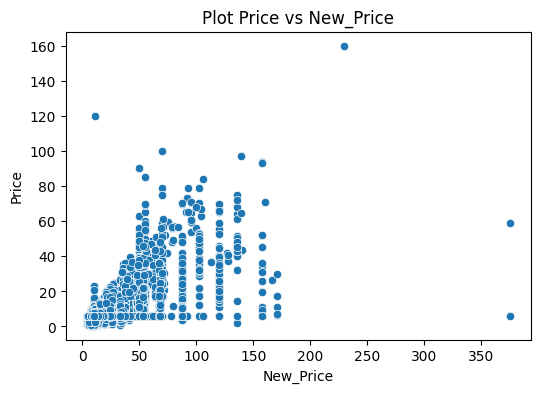

In [84]:
scatterplot_func(x ="New_Price",y="Price", title = "Plot Price vs New_Price")

There is strongly relationship between them

### Year Sales vs New_Price

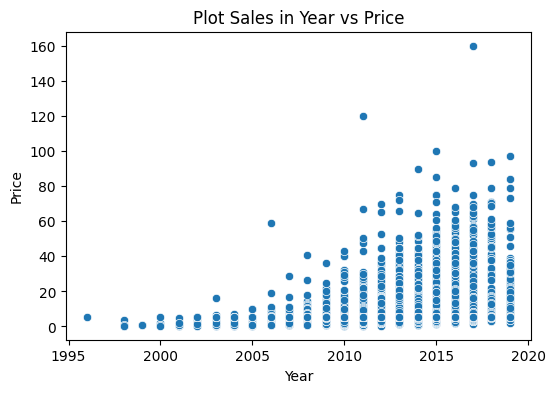

In [85]:
scatterplot_func(x ="Year",y="Price", title = "Plot Sales in Year vs Price")

There is little or no relationhip

### Kilometers_Driven vs New_Price

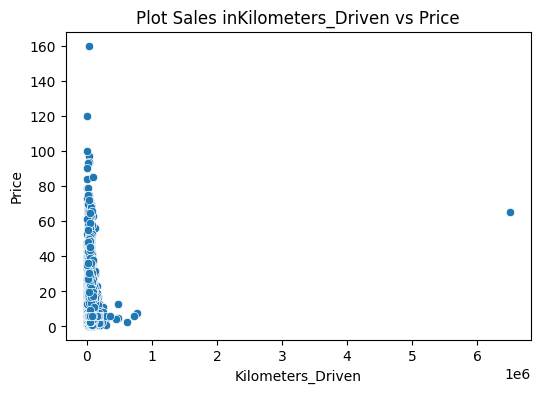

In [86]:
scatterplot_func(x ="Kilometers_Driven",y="Price", title = "Plot Sales inKilometers_Driven vs Price")

There is little or no relationship

### Seats vs New_Price

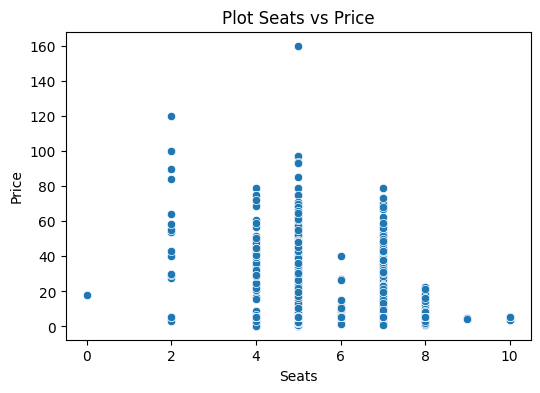

In [87]:
scatterplot_func(x ="Seats",y="Price", title = "Plot Seats vs Price")

There is slightly no relationship between them

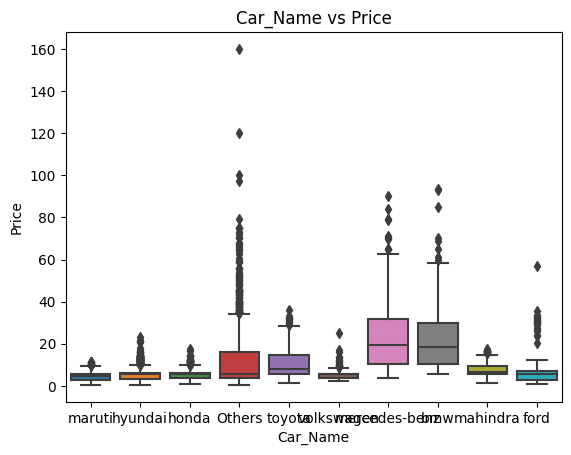

In [88]:
sns.boxplot(x ="Car_Name", y= "Price", data = df);
plt.title("Car_Name vs Price");

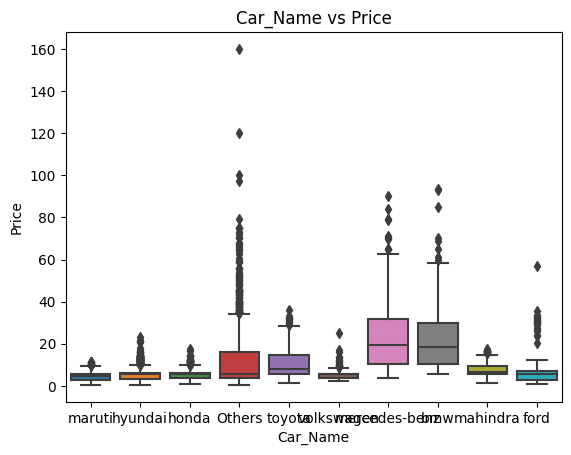

In [89]:
sns.boxplot(x ="Car_Name", y= "Price", data = df);
plt.title("Car_Name vs Price");

### Outlier Detection and handling

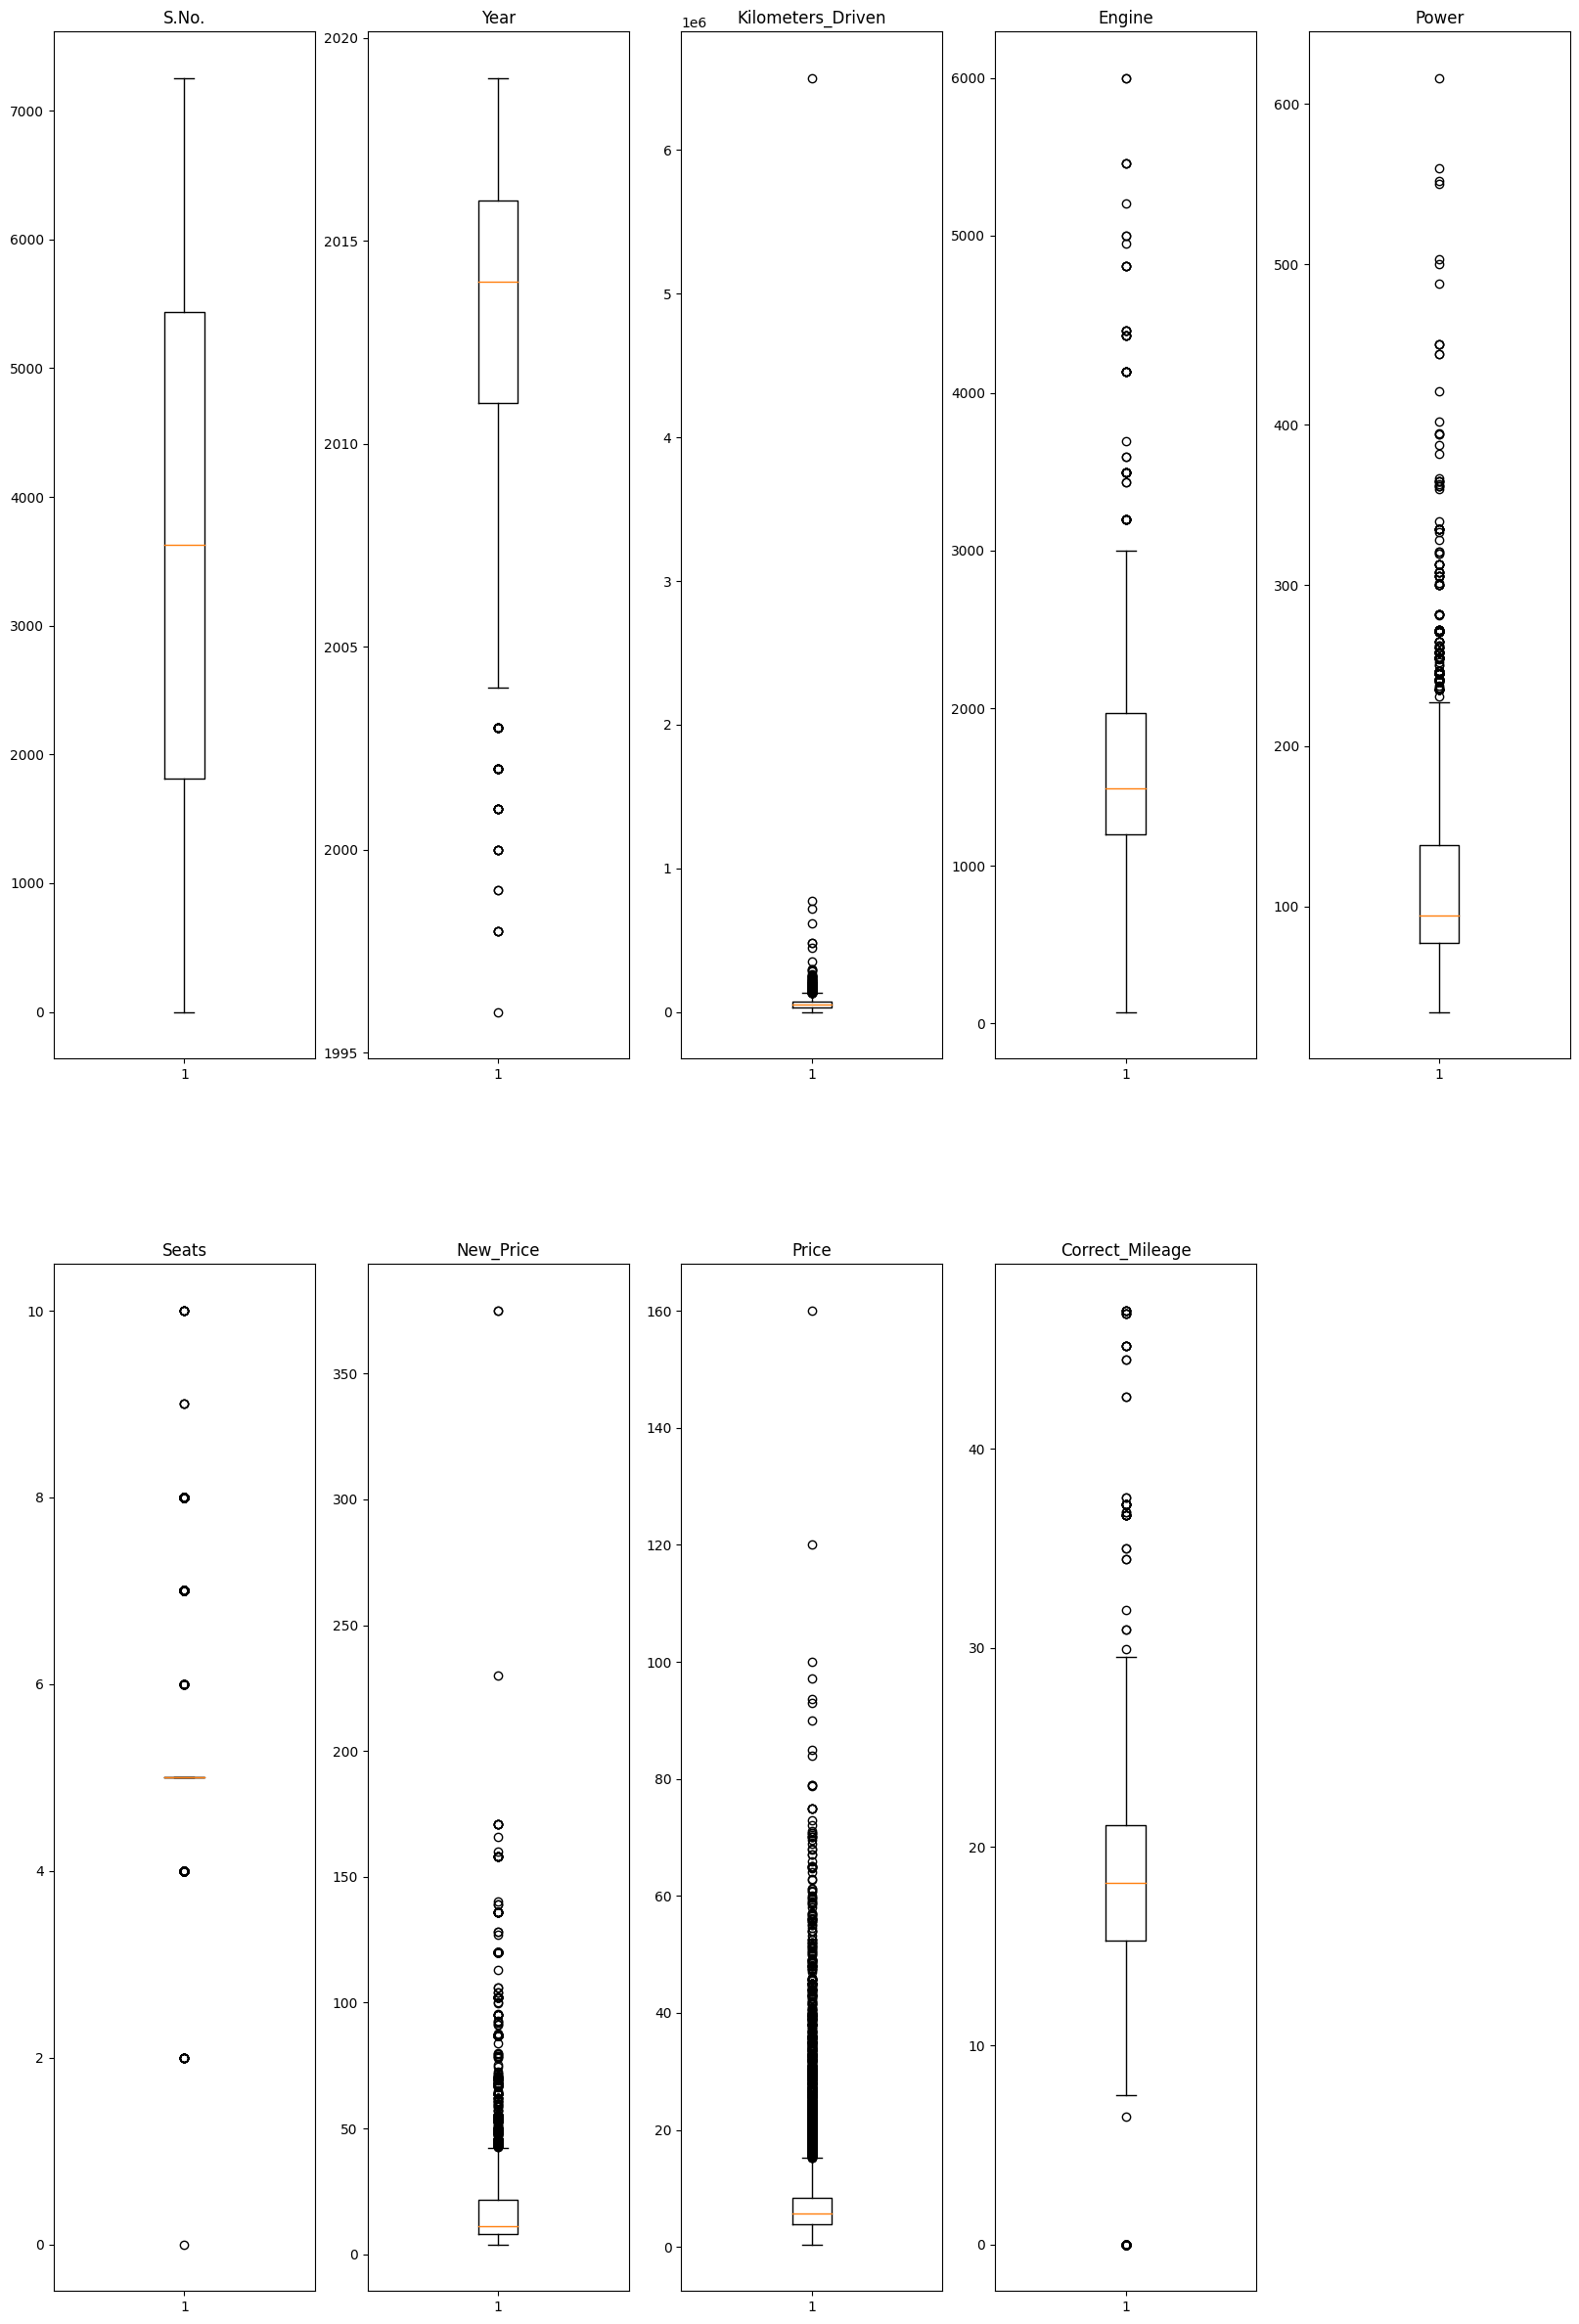

In [90]:
# outlier detection  using boxplot 
# Create a new figure with a size of 20 by 30 inches
plt.figure(figsize=(20, 30))

# Loop through each numerical variable in the dataset
for i, variable in enumerate(num_data):
    
    # Create a subplot in the figure with 2 rows and 5 columns, and set the current plot to the i-th one
    plt.subplot(2, 5, i+1)
    
    # Create a boxplot of the current variable
    plt.boxplot(df[variable])
    
    # Set the title of the current subplot to the name of the current variable
    plt.title(variable)
    
# Display the figure
plt.show()


# The first line of code plt.subplot(2,5, i+1) is creating a grid of 10 subplots arranged in a 2x5 grid, with the subplot index increasing by 1 for each iteration of the for loop
#The second line of code plt.boxplot(df[variable]) is creating a boxplot of the numerical data in the variable variable from the DataFrame df

### Outlier Treatment

In [91]:
num_data.drop('Price', axis = 1, inplace = True)

num_data.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats',
       'New_Price', 'Correct_Mileage'],
      dtype='object')

In [92]:
# how the  clip works 
l1 = [-30,5,0,300]
np.clip(l1,0,5) # for list l1 clip any value below min 0 and max 5 to there nearest end 

array([0, 5, 0, 5])

In [93]:
# This treat individual variable
def otliers_treatment(df,col):
    """
    Treat outliers in variable
    col: str, name of the numerical variable
    df: dataframe
    """
    Q1 = df[col].quantile(0.25) # 25th quantile
    Q3 = df[col].quantile(0.75) # 75th quantile
    IQR = Q3-Q1 # IQR = inter quantile range 
    lower_whisker = Q1-(1.5*IQR)
    upper_whiskers = Q3+(1.5*IQR)
    df[col]=np.clip(df[col],lower_whisker,upper_whiskers)
    return df

# treat all the numeric variable
# loop true the column and pass to the fubction
def all_outliers_treatment(df,col_list): 
    for c in col_list:
        df = outliers_treatment(df,c)
        return df

In [94]:
# This function treats outliers in a single numerical column of a dataframe
def outliers_treatment(df, col):
    """
    Treat outliers in a numerical column of a dataframe using the interquartile range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be treated.
    col (str): The name of the column to be treated.

    Returns:
    pandas.DataFrame: The modified dataframe with clipped values for the specified column.
    """
    # Calculate the 25th and 75th quantiles of the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper whiskers for outlier detection
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whiskers = Q3 + (1.5 * IQR)

    # Clip the values in the column to be within the lower and upper whiskers
    df[col] = np.clip(df[col], lower_whisker, upper_whiskers)

    return df


# This function treats outliers in all numerical columns of a dataframe
def all_outliers_treatment(df, col_list):
    """
    Treat outliers in all numerical columns of a dataframe using the interquartile range (IQR) method.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the columns to be treated.
    col_list (list of str): The list of column names to be treated.

    Returns:
    pandas.DataFrame: The modified dataframe with clipped values for all specified columns.
    """
    # Loop through the columns in the col_list and call the outliers_treatment function on each column
    for c in col_list:
        df = outliers_treatment(df, c)

    # Return the modified dataframe
    return df

In [95]:
df = all_outliers_treatment(df,num_data)

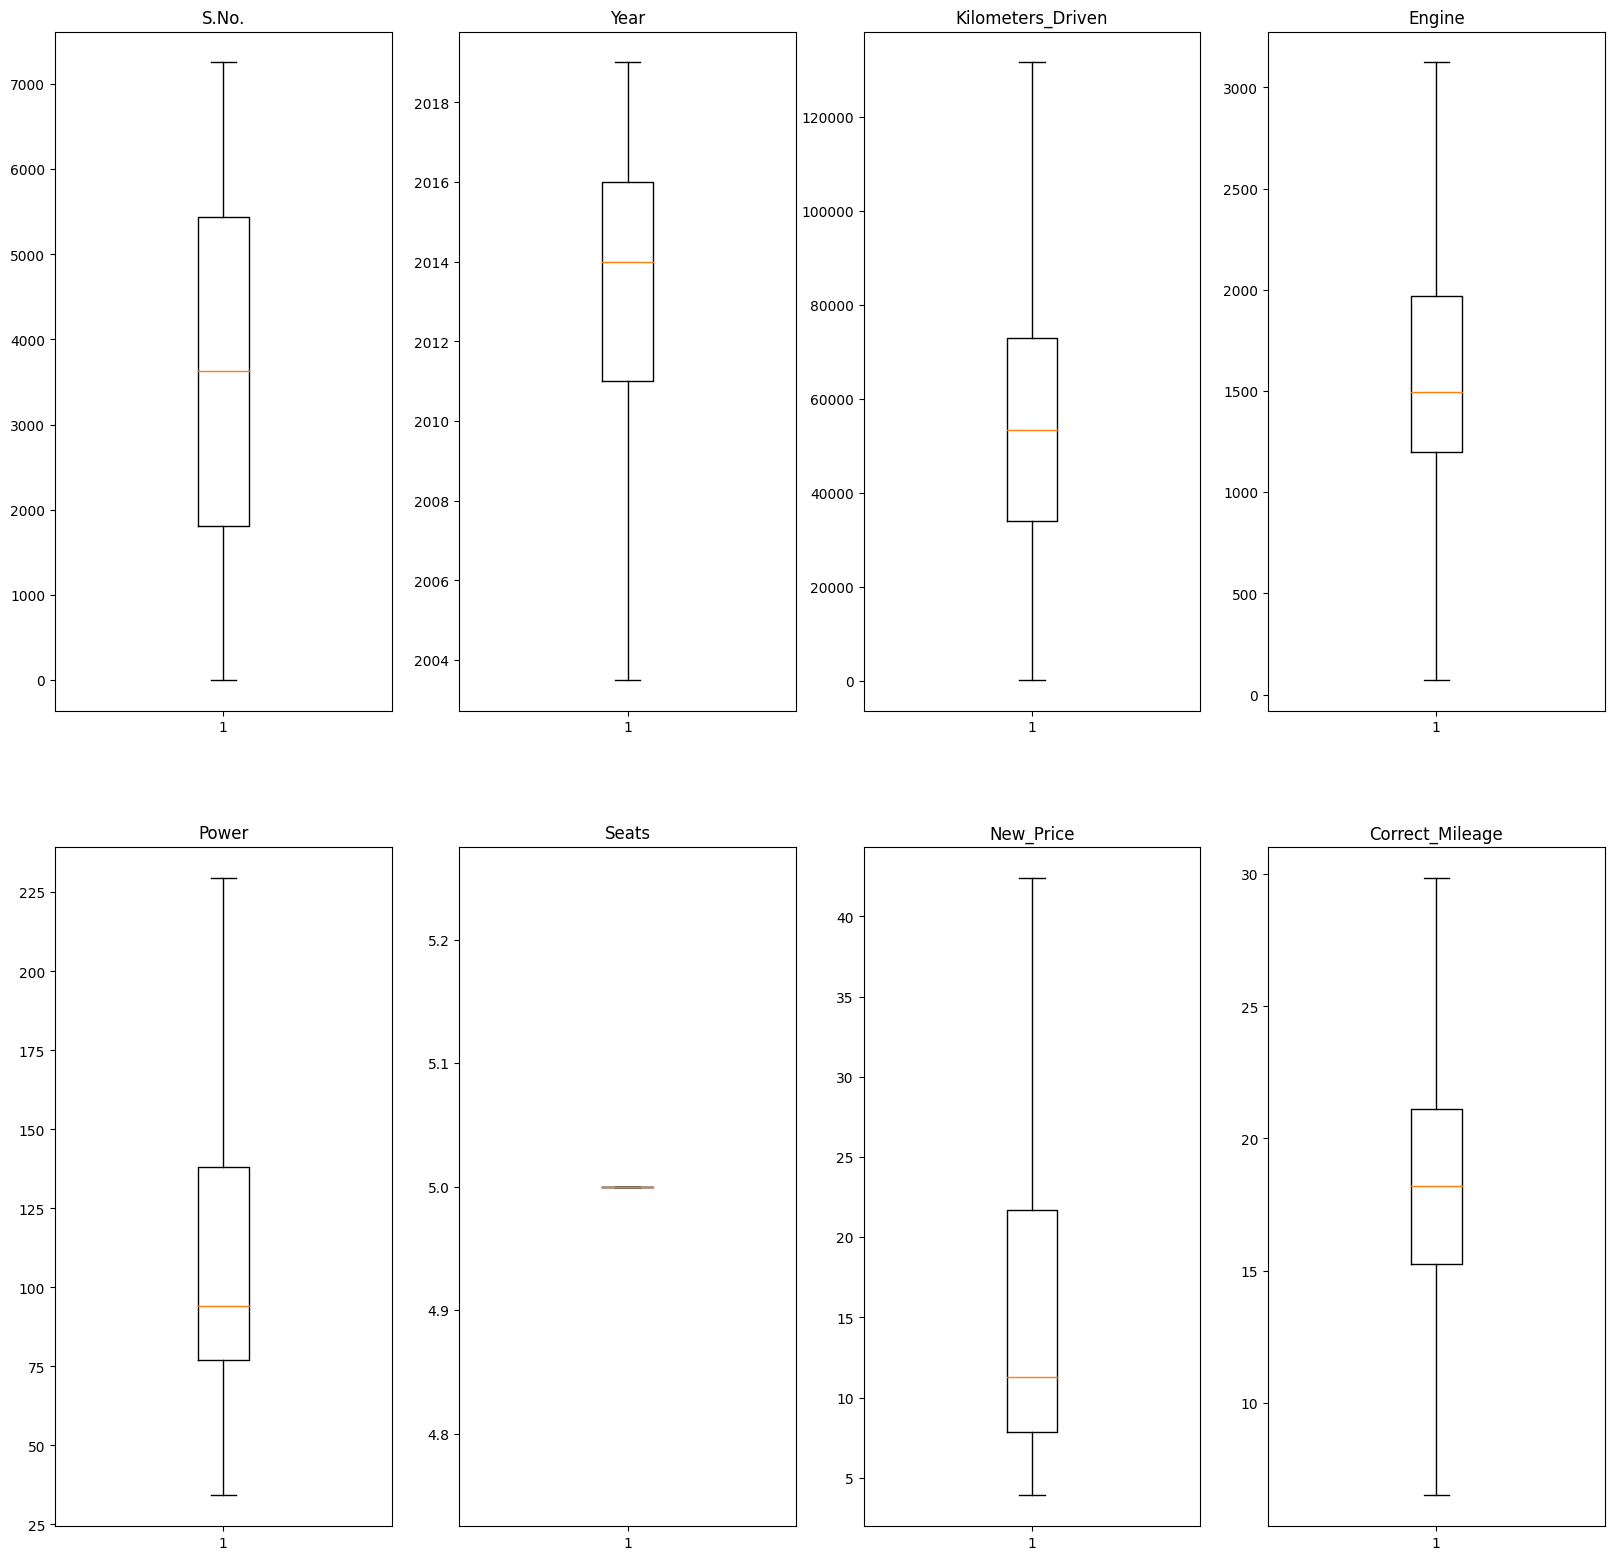

In [96]:
# Create a figure with a size of 20 by 30 inches
plt.figure(figsize=(20, 30))

# Loop through each numerical variable in the dataset
for i, variable in enumerate(num_data):
    
    # Create a subplot in the figure with 3 rows and 4 columns, and set the current plot to the i-th one
    plt.subplot(3, 4, i+1)
    
    # Create a boxplot of the current variable, with whiskers set to 1.5 times the interquartile range (IQR)
    plt.boxplot(df[variable], whis=1.5)
    
    # Set the title of the current subplot to the name of the current variable
    plt.title(variable)
    
# Show the figure
plt.show()

### Treating Outlier in Price

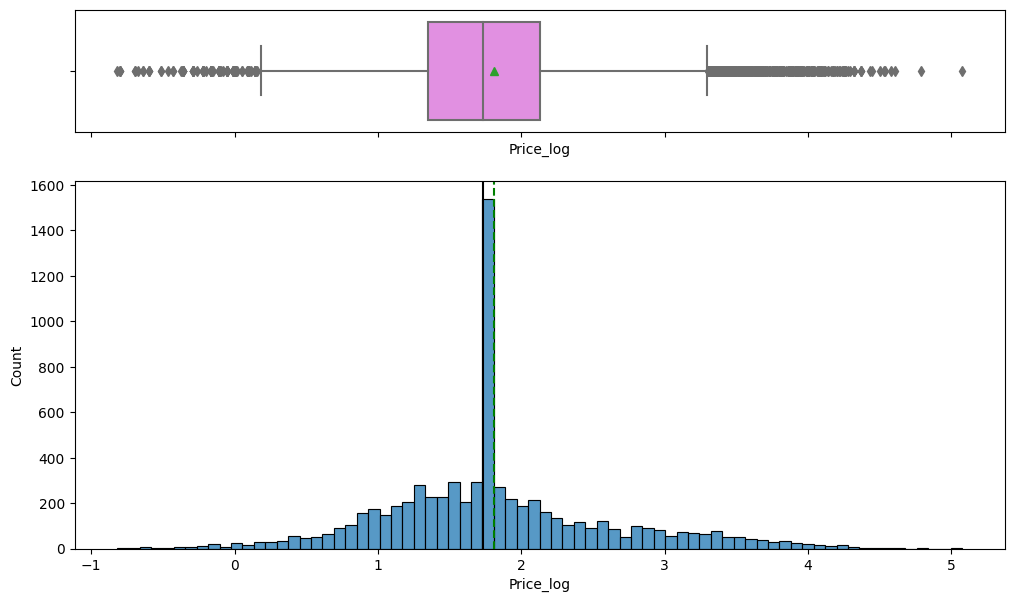

In [97]:
# transfrom the target using log transformation. it make left or write skewwed vairable  approximatly normal 
df["Price_log"] = np.log(df["Price"])

histogram_boxplot(data = df, feature="Price_log")


In [98]:
df.columns

Index(['S.No.', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'Car_Name', 'Correct_Mileage', 'Price_log'],
      dtype='object')

In [99]:
num_data.columns

Index(['S.No.', 'Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats',
       'New_Price', 'Correct_Mileage'],
      dtype='object')

# Model Building

In [158]:
# Select features and target
X = df[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats', 'New_Price', 'Car_Name', 'Correct_Mileage']]
y = df["Price_log"] + 1e-10

In [159]:
X.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine               0
Power                0
Seats                0
New_Price            0
Car_Name             0
Correct_Mileage      0
dtype: int64

In [160]:
# convert all categorical features to numerical data: OneHotEncoding
X = pd.get_dummies(X, drop_first = True)

X.head()

,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Correct_Mileage,Location_bangalore,Location_chennai,Location_coimbatore,...,Owner_Type_third,Car_Name_bmw,Car_Name_ford,Car_Name_honda,Car_Name_hyundai,Car_Name_mahindra,Car_Name_maruti,Car_Name_mercedes-benz,Car_Name_toyota,Car_Name_volkswagen
0,2010.0,72000,998.0,58.16,5.0,5.510,29.86,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2015.0,41000,1582.0,126.20,5.0,16.060,19.67,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2011.0,46000,1199.0,88.70,5.0,8.610,18.20,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2012.0,87000,1248.0,88.76,5.0,11.270,20.77,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2013.0,40670,1968.0,140.80,5.0,42.405,15.20,0,0,1,...,0,0,0,0,0,0,0,0,0,0


it not good to use catigorical varible with to much variable do feature engineering to group them

In [161]:
# split the data into training and testing and validation 

x_temp, x_test, y_temp, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)#
x_train, x_val, y_train, y_val = train_test_split(x_temp,y_temp,test_size = 0.2,random_state=42)#

In [162]:
x_train.shape

(4641, 34)

In [163]:
x_test.shape

(1451, 34)

In [164]:
x_val.shape

(1161, 34)

In [165]:
# Normalize the data
scaler = StandardScaler() # convert data to have a mean of zero and  SDT 1

#x_train = scaler.fit().transform()# same
x_train_sd = scaler.fit_transform(x_train) # fit calculate the mean & SDT of each of the variable. transform use cal mean and STD to transform our data 
x_test_sd = scaler.transform(x_test)
x_val_sd = scaler.transform(x_val)

# Multiple Linear Regression

In [166]:
# Build the linear regression model
lin_reg = LinearRegression()

# build model 
lin_reg.fit(x_train_sd,y_train)

LinearRegression()

### Model Performance Check

In [167]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    mse= mean_squared_error(target, pred)

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "MSE":mse,
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

### Interpreting Model Performance and Coefficients

In [168]:
lin_reg_training = model_performance_regression(lin_reg,x_train_sd,y_train)

lin_reg_training 

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.149674,0.386878,0.262343,0.762472,0.760719,1.145212e+09


The mean 86% of the veriation is explained on the feaure

In [169]:
lin_reg_val = model_performance_regression(lin_reg,x_val_sd,y_val)
lin_reg_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.139559,0.373576,0.26328,0.775981,0.769217,3.471834e+08


In [170]:
lin_reg_testing = model_performance_regression(lin_reg,x_test_sd,y_test)
lin_reg_testing

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.12551,0.354275,0.253282,0.809741,0.805172,2.013977e+09


The model is overfitting because the performance of the traing is not similar to the testing

In [171]:
print(lin_reg.coef_)

print(x_train.columns)

[ 3.17444502e-01 -5.19906224e-02  9.92655564e-02  2.01050181e-01
  3.13638004e-15  3.01183922e-01 -3.81968105e-02  1.94285711e-02
  6.63340351e-03  2.90157937e-02 -2.76503777e-02  2.39166878e-02
 -1.80628289e-02 -1.16254288e-02 -5.00797460e-02 -9.07104080e-03
 -1.16108528e-02  6.58646788e-02  1.30114241e-02  1.70501887e-03
 -1.09852365e-02 -2.77767244e-02  1.38194792e-02 -9.54893652e-03
 -2.14557324e-02 -1.02033322e-02  1.59087215e-02  4.52732682e-02
  6.61617604e-02  4.33886597e-03  9.53642593e-02  1.72078823e-03
  2.75260317e-02  3.37812660e-02]
Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'New_Price',
       'Correct_Mileage', 'Location_bangalore', 'Location_chennai',
       'Location_coimbatore', 'Location_delhi', 'Location_hyderabad',
       'Location_jaipur', 'Location_kochi', 'Location_kolkata',
       'Location_mumbai', 'Location_pune', 'Fuel_Type_diesel',
       'Fuel_Type_electric', 'Fuel_Type_lpg', 'Fuel_Type_petrol',
       'Transmission_manual', 'Owner_T

In [172]:
# The real coeffient = 
np.exp(1.02553363e-0)

2.7885831352150814

Meaning for a one unit prices on used cars, the Price increase by 2.7885831352150814

In [173]:
# getting all the real value because we used logbe for our target 
for i, col in enumerate(x_train.columns):
    print(f"{col} has coeffient of {np.exp(lin_reg.coef_[i])}")

Year has coeffient of 1.3736130098210306
Kilometers_Driven has coeffient of 0.9493377693017347
Engine has coeffient of 1.1043595303909495
Power has coeffient of 1.2226861256170447
Seats has coeffient of 1.000000000000003
New_Price has coeffient of 1.351457881922199
Correct_Mileage has coeffient of 0.962523487518737
Location_bangalore has coeffient of 1.0196185340207142
Location_chennai has coeffient of 1.0066554532549195
Location_coimbatore has coeffient of 1.02944085307
Location_delhi has coeffient of 0.972728394921043
Location_hyderabad has coeffient of 1.0242049855285962
Location_jaipur has coeffient of 0.982099326247223
Location_kochi has coeffient of 0.9884418854353066
Location_kolkata has coeffient of 0.9511535707424382
Location_mumbai has coeffient of 0.990969976969554
Location_pune has coeffient of 0.9884562930661273
Fuel_Type_diesel has coeffient of 1.0680821732040093
Fuel_Type_electric has coeffient of 1.0130964409698602
Fuel_Type_lpg has coeffient of 1.001706473240327
Fuel_T

The higher the coeffiecent the higher the contribution of varaible to the target. regulation involve adjusiting the coeffiecent. High coefficent lead to overfiting and vice verse

## Feature selection
- Forward selection
- Backward selection
- Lasso regression
- Correlation coeffiecent
- Select best k features
- Variance Threshold

In [174]:
def check_coeff(x_train, model):
    for i, col in enumerate(x_train.columns):
        print(f"{col} has coeffient of {np.exp(model.coef_[i])}")

In [175]:
#  import the ridge algorithm 
from sklearn.linear_model import Ridge

In [176]:
# instantiate the model 
ridge = Ridge(random_state=0)
#ridge = Ridge(random_state=0, alpha = 1.5)
# fit the model 
ridge.fit(x_train_sd,y_train)

#   observe the coefficients of the linear regression 

Ridge(random_state=0)

In [177]:
# check performance of ridge regression on trian data 
ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
ridge_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.149674,0.386878,0.262364,0.762472,0.760719,1.145569e+09


In [179]:
# check performance of ridge regression on testing data 
ridge_val = model_performance_regression(ridge, x_val_sd,y_val)
ridge_val 

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.139564,0.373583,0.263305,0.775972,0.769208,3.470748e+08


In [180]:
# writing a loop to check different value of alpha on the perfomance of the mode 
alpha_values = np.linspace(0.2, 10, num = 10)# start 0.2, stop 10, number of loops = 10 
for alpha in alpha_values:
    ridge = Ridge(random_state=0, alpha=alpha)
    ridge.fit(x_train_sd,y_train)
    ridge_train = model_performance_regression(ridge, x_train_sd,y_train)
    print(ridge_train)
    print(alpha)

        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.149674  0.386878  0.262347   0.762472        0.760719  1.145283e+09
0.2
        MSE      RMSE      MAE  R-squared  Adj. R-squared          MAPE
0  0.149674  0.386878  0.26237   0.762472        0.760719  1.145673e+09
1.288888888888889
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.149675  0.386878  0.262393   0.762472        0.760718  1.146063e+09
2.377777777777778
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.149675  0.386878  0.262416   0.762471        0.760718  1.146453e+09
3.4666666666666672
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.149675  0.386879  0.262439   0.762471        0.760717  1.146844e+09
4.555555555555556
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.149676  0.386879  0.262463    0.76247        0.760717  1.147234e+09
5.644444444444445
        MSE     RMSE       MAE 

Changing the alpha did not improve the perfarmce of our model. This mean Ridge could not perform on linear regression

### Lasso Regression

In [181]:
# import the lasso regression 
from sklearn.linear_model import Lasso

# instantiate the model 
lasso = Lasso(random_state=0)
# fit the model 
lasso.fit(x_train_sd,y_train)

Lasso(random_state=0)

In [182]:
# check performance of ridge regression on trian data 
lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
lasso_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.630134,0.79381,0.568388,0.0,-0.007382,3.490423e+09


In [183]:
# check performance of ridge regression on trian data 
lasso_val = model_performance_regression(lasso, x_val_sd,y_val)
lasso_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.625109,0.790638,0.558457,-0.00342,-0.033719,1.550297e+09


In [184]:
# writing a loop to check different value of alpha on the perfomance of the mode 
alpha_values = np.linspace(0.2, 10, num = 10)# start 0.2, stop 10, number of loops = 10 
for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha=alpha)
    lasso.fit(x_train_sd,y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
    print(lasso_train)
    print(alpha)

        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.249179  0.499179  0.380742   0.604561        0.601642  2.355415e+09
0.2
        MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.630134  0.79381  0.568388        0.0       -0.007382  3.490423e+09
1.288888888888889
        MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.630134  0.79381  0.568388        0.0       -0.007382  3.490423e+09
2.377777777777778
        MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.630134  0.79381  0.568388        0.0       -0.007382  3.490423e+09
3.4666666666666672
        MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.630134  0.79381  0.568388        0.0       -0.007382  3.490423e+09
4.555555555555556
        MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.630134  0.79381  0.568388        0.0       -0.007382  3.490423e+09
5.644444444444445
        MSE     RMSE       MAE  R-squar

In [185]:
# changing the alpha value for lasso  
alpha_values = np.linspace(0.001, 0.2, num = 10)# start 0.2, stop 10, number of loops = 10 
for alpha in alpha_values:
    lasso = Lasso(random_state=0, alpha=alpha)
    lasso.fit(x_train_sd,y_train)
    lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
    print(lasso_train)
    print(alpha)

        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.149751  0.386977  0.262918    0.76235        0.760596  1.161936e+09
0.001
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.160068  0.400085  0.283265   0.745978        0.744103  1.460201e+09
0.023111111111111114
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.167906  0.409764  0.298064   0.733538        0.731571  1.571585e+09
0.045222222222222226
       MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.17418  0.417349  0.308825   0.723583        0.721542  1.686166e+09
0.06733333333333334
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.182014  0.426631  0.319786   0.711151        0.709018  1.800404e+09
0.08944444444444445
        MSE    RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.191669  0.4378  0.331155   0.695829        0.693583  1.914067e+09
0.11155555555555556
        MSE      RMSE 

In [186]:
# 0.001 is the best alpha value for lasso 
lasso = Lasso(random_state=0, alpha=0.001)
lasso.fit(x_train_sd,y_train)
lasso_train = model_performance_regression(lasso, x_train_sd,y_train)
lasso_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.149751,0.386977,0.262918,0.76235,0.760596,1.161936e+09


In [187]:
lasso_val = model_performance_regression(lasso, x_val_sd,y_val)
lasso_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.139486,0.373478,0.263956,0.776098,0.769337,3.463136e+08


# Feature selection
## Forward selection

In [188]:
lasso = Lasso(random_state=0, alpha=0.001)

# build the forward  feature selection 
sfs = SFS(lasso, k_features=x_train.shape[1],forward = True, verbose = 2, scoring ="r2", n_jobs=-1)
# all  the draing data x_train.shape[1] [1] columns [o] rows, verbose = 2 show the process on screen , n_jobs = -1 us all the cpu in my system
sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    5.4s finished

[2023-05-09 06:03:00] Features: 1/34 -- score: 0.5089971888956475[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2023-05-09 06:03:00] Features: 2/34 -- score: 0.6932894038561757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  32 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.3s finished

[2023-05-09 06:03:01] Features: 3/34 -- score: 0.7311734596710534[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished

[2023-05-09 06:03:01] Features: 4/34 -- score: 0.73

In [189]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# build the forward  feature selection 
sfs = SFS(reg, k_features=x_train.shape[1],forward = True, verbose = 2, scoring ="r2", n_jobs=-1)
# all  the draing data x_train.shape[1] [1] columns [o] rows, verbose = 2 show the process on screen , n_jobs = -1 us all the cpu in my system
sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.3s finished

[2023-05-09 06:03:16] Features: 1/34 -- score: 0.5089960718775411[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2023-05-09 06:03:16] Features: 2/34 -- score: 0.6932904393314446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.3s finished

[2023-05-09 06:03:17] Features: 3/34 -- score: 0.7311747656782038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.3s finished

[2023-05-09 06:03:17] Features: 4/34 -- score: 0.7369655407966335[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.3s remaining:

### Visualize the model performance with the addition of each feature

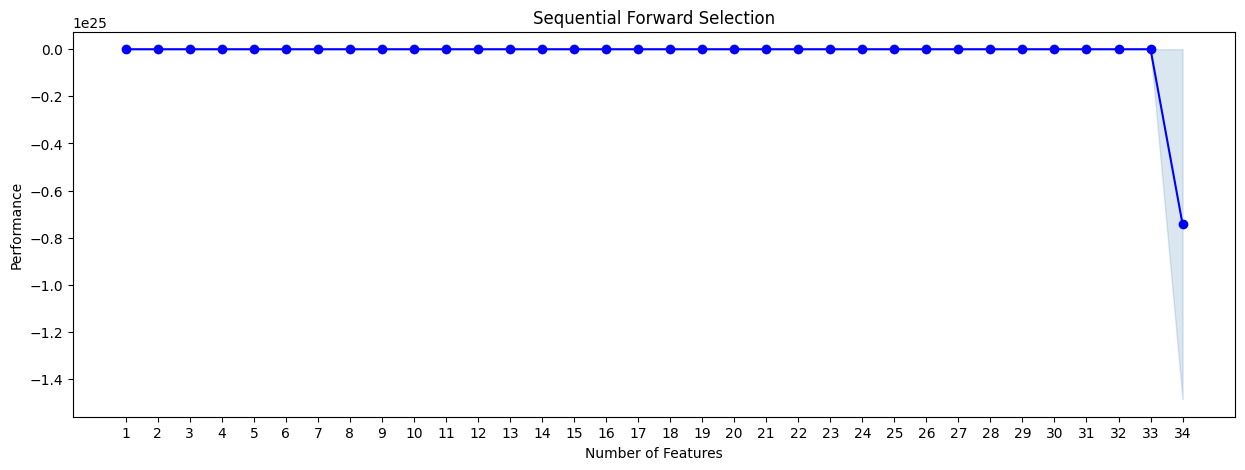

In [190]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs 
fig11 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15,5))
plt.title("Sequential Forward Selection")
plt.show()

In [191]:
# build the forward  20 feature selection 
sfs = SFS(reg, k_features=20,forward = True, verbose = 2, scoring ="r2", n_jobs=-1)
# all  the draing data x_train.shape[1] [1] columns [o] rows, verbose = 2 show the process on screen , n_jobs = -1 us all the cpu in my system
sfs = sfs.fit(x_train_sd,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  34 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    0.2s finished

[2023-05-09 06:04:06] Features: 1/20 -- score: 0.5089960718775411[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    0.2s finished

[2023-05-09 06:04:07] Features: 2/20 -- score: 0.6932904393314446[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    0.2s finished

[2023-05-09 06:04:07] Features: 3/20 -- score: 0.7311747656782038[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  31 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:    0.4s finished

[2023-05-09 06:04:08] Features: 4/20 -- score: 0.73

In [192]:
# list of the best features 
list(sfs.k_feature_idx_)

[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 14, 17, 21, 26, 27, 28, 30, 32, 33]

In [193]:
# important features
feat_cols = list(sfs.k_feature_idx_)


x_train.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'New_Price',
       'Correct_Mileage', 'Location_bangalore', 'Location_chennai',
       'Location_coimbatore', 'Location_delhi', 'Location_hyderabad',
       'Location_kolkata', 'Fuel_Type_diesel', 'Transmission_manual',
       'Car_Name_ford', 'Car_Name_honda', 'Car_Name_hyundai',
       'Car_Name_maruti', 'Car_Name_toyota', 'Car_Name_volkswagen'],
      dtype='object')

In [194]:
# important features
feat_cols = list(sfs.k_feature_idx_)


x_train2 = x_train.columns[feat_cols]
x_test2 = x_test.columns[feat_cols]

In [195]:
x_train2

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'New_Price',
       'Correct_Mileage', 'Location_bangalore', 'Location_chennai',
       'Location_coimbatore', 'Location_delhi', 'Location_hyderabad',
       'Location_kolkata', 'Fuel_Type_diesel', 'Transmission_manual',
       'Car_Name_ford', 'Car_Name_honda', 'Car_Name_hyundai',
       'Car_Name_maruti', 'Car_Name_toyota', 'Car_Name_volkswagen'],
      dtype='object')

In [196]:
# select the top performing feature
x_train2 = x_train[x_train.columns[feat_cols]]
x_test2 = x_test[x_test.columns[feat_cols]]
x_val2 = x_val[x_val.columns[feat_cols]]

In [197]:
x_train2

,Year,Kilometers_Driven,Engine,Power,New_Price,Correct_Mileage,Location_bangalore,Location_chennai,Location_coimbatore,Location_delhi,Location_hyderabad,Location_kolkata,Fuel_Type_diesel,Transmission_manual,Car_Name_ford,Car_Name_honda,Car_Name_hyundai,Car_Name_maruti,Car_Name_toyota,Car_Name_volkswagen
226,2015.0,46173,1461.0,108.50,16.65,19.01,0,0,1,0,0,0,1,1,0,0,0,0,0,0
6309,2015.0,36933,814.0,55.20,10.25,20.77,0,0,1,0,0,0,0,1,0,0,1,0,0,0
5725,2013.0,120000,1968.0,138.10,25.83,20.68,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1076,2016.0,68000,3123.0,197.00,35.29,10.91,0,0,0,0,1,0,1,0,1,0,0,0,0,0
5840,2007.0,131500,2499.0,141.00,35.29,14.84,0,1,0,0,0,0,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3804,2015.0,45000,1396.0,88.76,10.25,21.90,0,0,0,0,0,1,1,1,0,0,1,0,0,0
4000,2011.0,37000,1399.0,68.05,7.65,20.00,0,0,0,0,0,1,1,1,1,0,0,0,0,0
2479,2013.0,44378,936.0,57.60,11.30,25.44,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2524,2003.5,101000,1061.0,64.00,5.51,17.30,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [198]:
# transform new selected column 
x_train2_sd = scaler.fit_transform(x_train2)
x_test2_sd = scaler.transform(x_test2)
x_val2_sd = scaler.transform(x_val2)

In [199]:
# re-build the linear regression

lin_reg2 = LinearRegression()

lin_reg2.fit(x_train2_sd,y_train)

LinearRegression()

In [200]:
reg2_train = model_performance_regression(lin_reg2,x_train2_sd,y_train)
reg2_train

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.1508,0.388329,0.263186,0.760686,0.75965,1.206355e+09


In [201]:
reg2_val = model_performance_regression(lin_reg2,x_val2_sd,y_val)
reg2_val

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.141533,0.376208,0.265219,0.772812,0.768827,4.580302e+08


In [202]:
from sklearn.metrics.pairwise import laplacian_kernel
reg2_test = model_performance_regression(lin_reg2, x_test2_sd,y_test)
reg2_test

,MSE,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.124675,0.353093,0.253291,0.811008,0.808364,2.008666e+09


# Tree Based Model

For this mode we dont need to nromalize the data. hence we will use the original train validation and test data. you dont need to treat outlier for random fores, kb, gradi.

In [203]:
# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_sd, y_train)

# Gradient Boosting Regression
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(x_train_sd, y_train)

GradientBoostingRegressor(random_state=42)

In [204]:
gradient_test = model_performance_regression(gb, x_test_sd,y_test)
print("Model performance of Gradient Boosting regression")
print(gradient_test) 
print()

random_test = model_performance_regression(rf, x_test_sd,y_test)
print("Model performance of RandomForest regression")
print(random_test) 
print()

Model performance of Gradient Boosting regression
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.121844  0.349061  0.248315   0.815299        0.810864  1.900596e+09

Model performance of RandomForest regression
       MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.12061  0.34729  0.238767   0.817169        0.812779  1.890179e+09



In [205]:
# random forest training 
random_train = model_performance_regression(rf, x_train_sd,y_train)
print("Model performance of RandomForest regression on train data")
print(random_train) 
print()
# random forest train
random_test = model_performance_regression(rf, x_test_sd,y_test)
print("Model performance of RandomForest regression on test data")
print(random_test) 
print()


# gradian_bosting test
gradient_train = model_performance_regression(gb, x_train_sd,y_train)
print("Model performance of Gradient Boosting regression on train data")
print(gradient_train) 
print()

gradient_test = model_performance_regression(gb, x_test_sd,y_test)
print("Model performance of Gradient Boosting regression on test data")
print(gradient_test) 
print()

Model performance of RandomForest regression on train data
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.020269  0.142368  0.092705   0.967834        0.967597  2.667090e+08

Model performance of RandomForest regression on test data
       MSE     RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.12061  0.34729  0.238767   0.817169        0.812779  1.890179e+09

Model performance of Gradient Boosting regression on train data
      MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.1163  0.341028  0.235854   0.815435        0.814073  8.873921e+08

Model performance of Gradient Boosting regression on test data
        MSE      RMSE       MAE  R-squared  Adj. R-squared          MAPE
0  0.121844  0.349061  0.248315   0.815299        0.810864  1.900596e+09



Random Forest Regression overfitted alittle bit it is the best perforiming model with r2 score of 0.99 and 0.99 for the traing and testing data respectively. the difference btw r2 and r4 is not that high.

It appears that the Random Forest regression model outperformed the Gradient Boosting regression model on both the train and test data, based on a number of metrics. The Random Forest model had lower MSE, RMSE, and MAE scores on both the train and test data compared to the Gradient Boosting model, indicating that it had better accuracy and precision in its predictions. The R-squared and adjusted R-squared scores were also higher for the Random Forest model, suggesting that it explained more of the variance in the data than the Gradient Boosting model. Finally, the MAPE scores for the Random Forest model were significantly lower than those for the Gradient Boosting model, indicating that it had lower relative error in its predictions. Overall, it appears that the Random Forest regression model is the better performer based on the given metrics. However, it's important to note that performance metrics alone may not be enough to determine the best model for a given problem, and other factors such as interpretability, computational efficiency, and domain knowledge should also be considered when selecting a model.

## Visualize the important feature by random forest model Visualize the important feature by random forest model

In [206]:
feature_names = x_train.columns.to_list()

In [207]:
# getting the important features in order of importance 
import_feature = rf.feature_importances_

import_feature

array([2.00348868e-01, 5.04692709e-02, 3.55675170e-02, 1.28798521e-01,
       0.00000000e+00, 4.64233522e-01, 6.01462891e-02, 3.40036424e-03,
       2.29197583e-03, 4.57838791e-03, 3.81263219e-03, 4.77769246e-03,
       3.24658141e-03, 3.17450494e-03, 5.54398462e-03, 3.33909123e-03,
       2.81606546e-03, 2.05364186e-03, 1.36732418e-04, 1.56167686e-04,
       1.81204039e-03, 2.28553097e-03, 1.09361129e-03, 4.56157606e-03,
       1.74367457e-03, 1.60769024e-03, 8.55732392e-04, 4.88845429e-04,
       1.22950837e-03, 3.52227961e-04, 1.47488961e-03, 1.53138716e-03,
       1.54137295e-03, 5.30101638e-04])

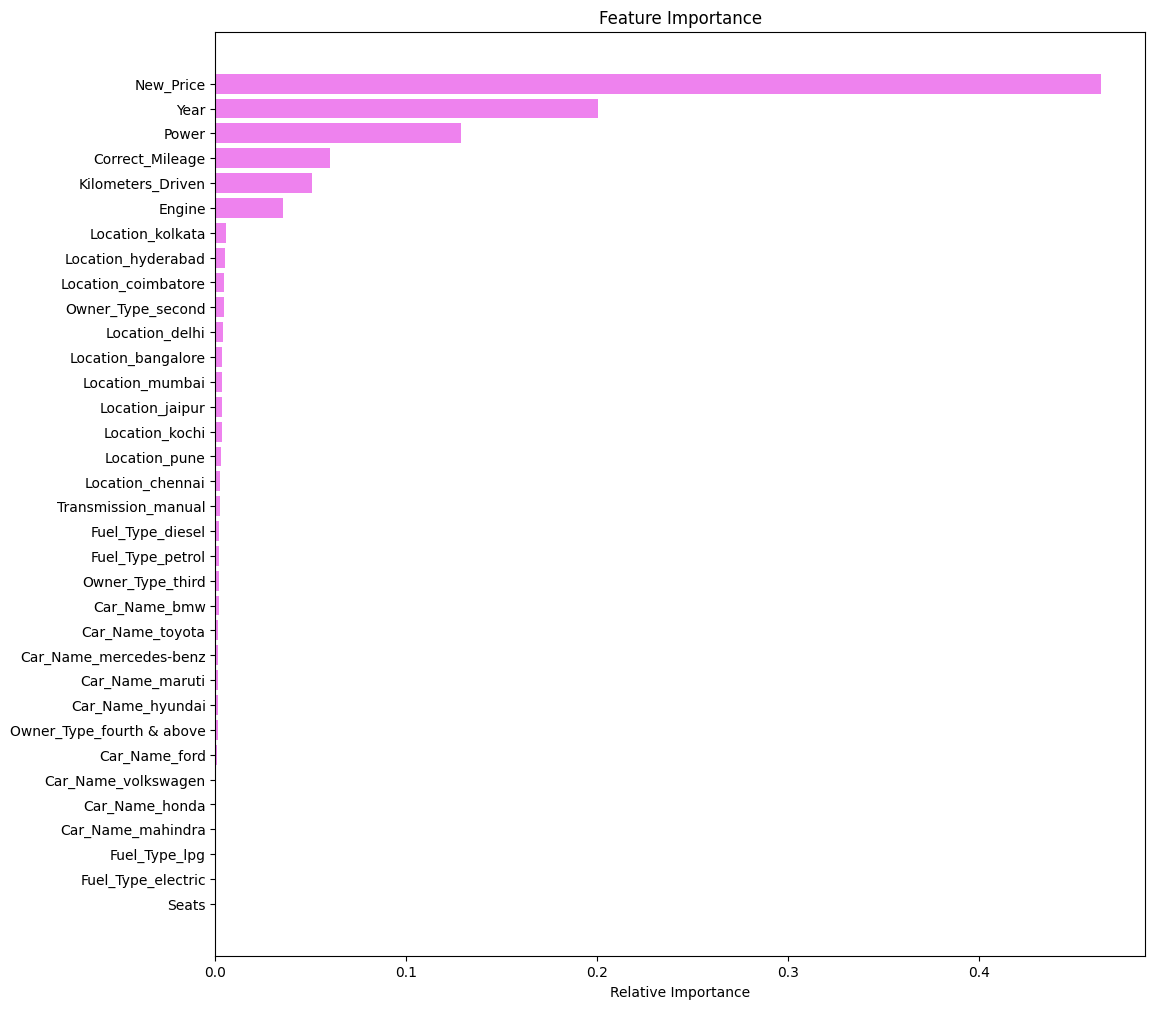

In [208]:
# to visaulize 
import_feature = rf.feature_importances_
indices=np.argsort(import_feature)# sorting the important features 
plt.figure(figsize=(12,12))
plt.title("Feature Importance")
plt.barh(range(len(indices)),import_feature[indices], color ="violet", align="center")                        # barh = horizontal bar plot, thick = (range(len(indices)), center alignment = align=""

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

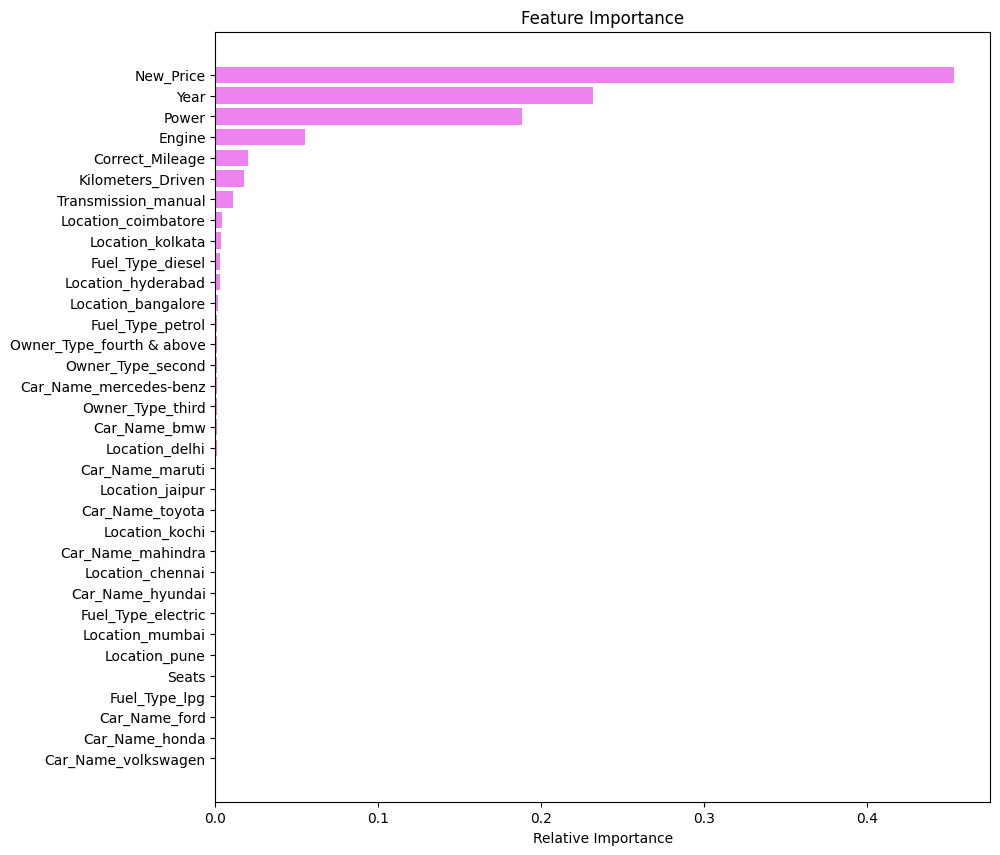

In [209]:
# To visaulize by Gradient Boosting Regressor
import_feature = gb.feature_importances_
indices=np.argsort(import_feature)# sorting the important features 
plt.figure(figsize=(10,10))
plt.title("Feature Importance")
plt.barh(range(len(indices)),import_feature[indices], color ="violet", align="center")                        # barh = horizontal bar plot, thick = (range(len(indices)), center alignment = align=""

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The plot above show that people buy used car because of the New Price 
- The year also determine the price of the used cars
- The power of the car also determine thge price of the used cars
- The Engine capacity also determine the price of the used cars
- The Kilometers car have been droven determine the price of the used cars
- The data shows that people buy Manual used car compaired to Automatic 

## Insights and Recommendations that will Help the Business

It appears that several factors contribute to the price of used cars. According to the available data, the original price of the car, its model year, power, engine capacity, and the number of kilometers it has been driven are all factors that can affect its price. Additionally, the data suggests that people tend to buy manual used cars more frequently than automatic ones.

Offer more used cars with attractive features: Based on the data, buyers appear to be interested in cars with lower original prices, more power, and larger engine capacities. Therefore, the company could consider stocking more used cars with these features to attract buyers.

Emphasize the quality of manual cars: Since the data suggests that buyers tend to prefer manual cars over automatic ones, the company could consider emphasizing the quality and reliability of its manual cars to attract more buyers.

Offer competitive pricing: Price is a significant factor in buyers' decisions to purchase used cars. Therefore, the company could consider offering competitive pricing to attract buyers, especially those who are price-sensitive.

Advertise effectively: The company could consider advertising its used car offerings on social media, automotive websites, and other relevant platforms to reach more potential buyers.

Offer financing options: Many buyers of used cars may require financing to make a purchase. The company could consider offering financing options or partnering with financial institutions to provide financing to potential buyers.

# Classification

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   float64
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Engine             7253 non-null   float64
 8   Power              7253 non-null   float64
 9   Seats              7253 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              7253 non-null   float64
 12  Car_Name           7253 non-null   object 
 13  Correct_Mileage    7253 non-null   float64
 14  Price_log          7253 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 850.1+ KB


In [211]:
# Select features and target
X = df[['Price_log', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Engine', 'Power', 'Seats', 'New_Price', 'Car_Name', 'Correct_Mileage']]
y = df["Location"] 

In [212]:
X

,Price_log,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,New_Price,Car_Name,Correct_Mileage
0,0.559616,2010.0,72000,cng,manual,first,998.0,58.16,5.0,5.510,maruti,29.86
1,2.525729,2015.0,41000,diesel,manual,first,1582.0,126.20,5.0,16.060,hyundai,19.67
2,1.504077,2011.0,46000,petrol,manual,first,1199.0,88.70,5.0,8.610,honda,18.20
3,1.791759,2012.0,87000,diesel,manual,first,1248.0,88.76,5.0,11.270,maruti,20.77
4,2.875822,2013.0,40670,diesel,automatic,second,1968.0,140.80,5.0,42.405,Others,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1.729884,2011.0,89411,diesel,manual,first,1598.0,103.60,5.0,13.230,volkswagen,23.08
7249,1.729884,2015.0,59000,petrol,automatic,first,1197.0,103.60,5.0,10.150,volkswagen,17.20
7250,1.729884,2012.0,28000,diesel,manual,first,1461.0,63.10,5.0,9.470,Others,10.00
7251,1.729884,2013.0,52262,petrol,automatic,third,1197.0,103.60,5.0,10.150,volkswagen,18.20


In [213]:
# OneHotEncoding on selected features
X_new = pd.get_dummies(X, drop_first = True)

X_new

,Price_log,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Correct_Mileage,Fuel_Type_diesel,Fuel_Type_electric,...,Owner_Type_third,Car_Name_bmw,Car_Name_ford,Car_Name_honda,Car_Name_hyundai,Car_Name_mahindra,Car_Name_maruti,Car_Name_mercedes-benz,Car_Name_toyota,Car_Name_volkswagen
0,0.559616,2010.0,72000,998.0,58.16,5.0,5.510,29.86,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2.525729,2015.0,41000,1582.0,126.20,5.0,16.060,19.67,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1.504077,2011.0,46000,1199.0,88.70,5.0,8.610,18.20,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.791759,2012.0,87000,1248.0,88.76,5.0,11.270,20.77,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2.875822,2013.0,40670,1968.0,140.80,5.0,42.405,15.20,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,1.729884,2011.0,89411,1598.0,103.60,5.0,13.230,23.08,1,0,...,0,0,0,0,0,0,0,0,0,1
7249,1.729884,2015.0,59000,1197.0,103.60,5.0,10.150,17.20,0,0,...,0,0,0,0,0,0,0,0,0,1
7250,1.729884,2012.0,28000,1461.0,63.10,5.0,9.470,10.00,1,0,...,0,0,0,0,0,0,0,0,0,0
7251,1.729884,2013.0,52262,1197.0,103.60,5.0,10.150,18.20,0,0,...,1,0,0,0,0,0,0,0,0,1


In [214]:
# encoding the target 

from sklearn.preprocessing import LabelEncoder

label_e = LabelEncoder()
y_new = label_e.fit_transform(y)

In [221]:
Counter(y_new)

Counter({9: 949,
         10: 765,
         2: 591,
         3: 772,
         5: 876,
         6: 499,
         7: 772,
         8: 654,
         4: 660,
         1: 440,
         0: 275})

In [222]:
y_new

array([ 9, 10,  2, ...,  8, 10,  7])

In [223]:
# split the data
x_temp, x_test, y_temp, y_test = train_test_split(X_new, y_new, test_size = 0.2, 
                                                  random_state = 0,)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.2, 
                                                  random_state = 0)

In [224]:
x_val.shape

(1161, 25)

In [225]:
# train the random forest model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)

# train the model
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

## Model Performance Check

In [226]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

C:\Users\Rebirthlogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


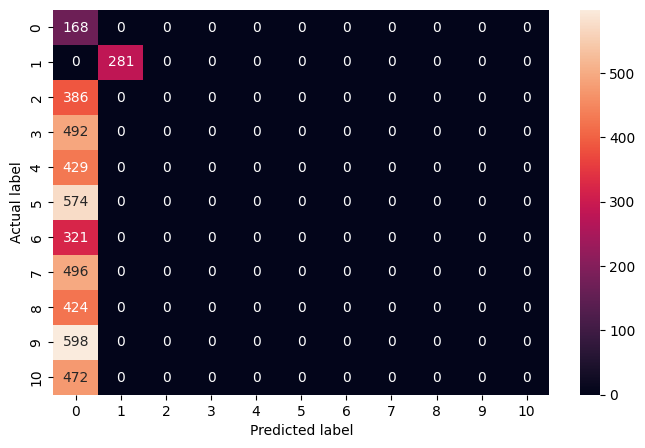

,Accuracy,Recall,Precision,F1-score
0,0.096746,0.096746,0.061942,0.063233


In [227]:
rf_train_cls = model_performance_classification(rf_clf, x_train, y_train)
rf_train_cls

C:\Users\Rebirthlogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


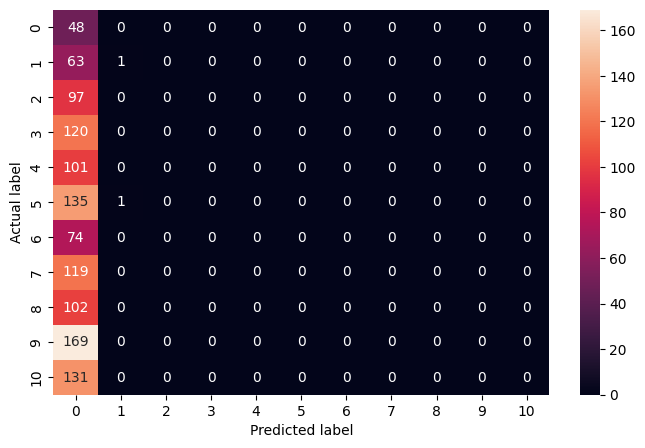

,Accuracy,Recall,Precision,F1-score
0,0.042205,0.042205,0.029275,0.004959


In [228]:
rf_val_cls = model_performance_classification(rf_clf, x_val, y_val)
rf_val_cls

## Model Improvement strategy
Balancing imbalanced data using SMOTE

In [230]:
sm = SMOTE(random_state=0)

In [231]:
X_sm, y_sm = sm.fit_resample(X_new, y_new)

In [232]:
Counter(y_sm)

Counter({9: 949,
         10: 949,
         2: 949,
         3: 949,
         5: 949,
         6: 949,
         7: 949,
         8: 949,
         4: 949,
         1: 949,
         0: 949})

In [233]:
# split the data
x_temp, x_test, y_temp, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, 
                                                  random_state = 0,)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size = 0.2, 
                                                  random_state = 0)

In [234]:
# training the model
rf_clf2 = RandomForestClassifier(random_state=0)

# train the model
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

C:\Users\Rebirthlogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


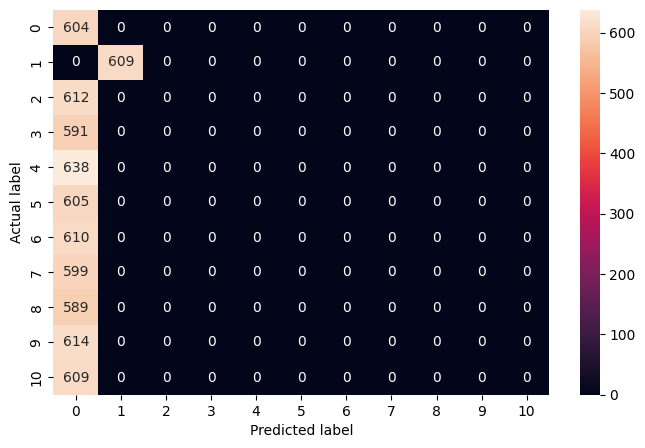

,Accuracy,Recall,Precision,F1-score
0,0.181587,0.181587,0.100163,0.107531


In [235]:
rf_train_clf2 = model_performance_classification(rf_clf2, x_train, y_train)
rf_train_clf2

C:\Users\Rebirthlogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


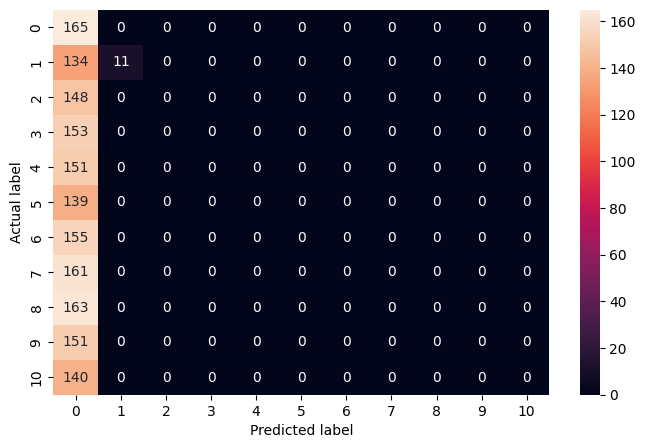

,Accuracy,Recall,Precision,F1-score
0,0.105326,0.105326,0.096589,0.030092


In [236]:
rf_val_clf2 = model_performance_classification(rf_clf2, x_val, y_val)
rf_val_clf2

## Unsupervised Learning